In [ ]:
# https://archive.ics.uci.edu/dataset/45/heart+disease

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/heart_attack_prediction_dataset.csv")

In [4]:
print("Shape of dataset:", df.shape)
print("First 15 rows:")
display(df.head(15))

Shape of dataset: (920, 14)
First 15 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28.0,1.0,2.0,130,132,0,2,185,0,0,?,?,?,0
1,29.0,1.0,2.0,120,243,0,0,160,0,0,?,?,?,0
2,29.0,1.0,2.0,140,?,0,0,170,0,0,?,?,?,0
3,30.0,0.0,1.0,170,237,0,1,170,0,0,?,?,6,0
4,31.0,0.0,2.0,100,219,0,1,150,0,0,?,?,?,0
5,32.0,0.0,2.0,105,198,0,0,165,0,0,?,?,?,0
6,32.0,1.0,2.0,110,225,0,0,184,0,0,?,?,?,0
7,32.0,1.0,2.0,125,254,0,0,155,0,0,?,?,?,0
8,33.0,1.0,3.0,120,298,0,0,185,0,0,?,?,?,0
9,34.0,0.0,2.0,130,161,0,0,190,0,0,?,?,?,0


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         920 non-null    float64
 1   sex         920 non-null    float64
 2   cp          920 non-null    float64
 3   trestbps    920 non-null    object 
 4   chol        920 non-null    object 
 5   fbs         920 non-null    object 
 6   restecg     920 non-null    object 
 7   thalach     920 non-null    object 
 8   exang       920 non-null    object 
 9   oldpeak     920 non-null    object 
 10  slope       920 non-null    object 
 11  ca          920 non-null    object 
 12  thal        920 non-null    object 
 13  num         920 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 100.8+ KB
None


In [6]:
print(df.isnull().sum())

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64


In [7]:
# Data Preprocessing & Feature Engineering

# Count missing values in the problematic features
missing_analysis = pd.DataFrame({
    'feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
    'total_missing': [
        (df['age'] == '?').sum(),
        (df['sex'] == '?').sum(),
        (df['cp'] == '?').sum(),
        (df['trestbps'] == '?').sum(),
        (df['chol'] == '?').sum(),
        (df['fbs'] == '?').sum(),
        (df['restecg'] == '?').sum(),
        (df['thalach'] == '?').sum(),
        (df['exang'] == '?').sum(),
        (df['oldpeak'] == '?').sum(),
        (df['slope'] == '?').sum(),
        (df['ca'] == '?').sum(),
        (df['thal'] == '?').sum(),
    ],
    'missing_percentage': [
        ((df['age'] == '?').sum() / len(df)) * 100,
        ((df['sex'] == '?').sum() / len(df)) * 100,
        ((df['cp'] == '?').sum() / len(df)) * 100,
        ((df['trestbps'] == '?').sum() / len(df)) * 100,
        ((df['chol'] == '?').sum() / len(df)) * 100,
        ((df['fbs'] == '?').sum() / len(df)) * 100,
        ((df['restecg'] == '?').sum() / len(df)) * 100,
        ((df['thalach'] == '?').sum() / len(df)) * 100,
        ((df['exang'] == '?').sum() / len(df)) * 100,
        ((df['oldpeak'] == '?').sum() / len(df)) * 100,
        ((df['slope'] == '?').sum() / len(df)) * 100,
        ((df['thal'] == '?').sum() / len(df)) * 100,
        ((df['ca'] == '?').sum() / len(df)) * 100
    ]
})

print("Missing Value Analysis:")
print(missing_analysis)

Missing Value Analysis:
     feature  total_missing  missing_percentage
0        age              0            0.000000
1        sex              0            0.000000
2         cp              0            0.000000
3   trestbps             59            6.413043
4       chol             30            3.260870
5        fbs             90            9.782609
6    restecg              2            0.217391
7    thalach             55            5.978261
8      exang             55            5.978261
9    oldpeak             62            6.739130
10     slope            309           33.586957
11        ca            611           52.826087
12      thal            486           66.413043


In [8]:
from sklearn.impute import KNNImputer

def clean_heart_disease_data(df):
    """
    Comprehensive cleaning function for UCI Heart Disease dataset
    """
    # Make a copy to avoid modifying original
    df_clean = df.copy()
    
    # Step 1: Drop high-missing columns
    columns_to_drop = ['slope', 'thal', 'ca']
    df_clean = df_clean.drop(columns=columns_to_drop, errors='ignore')
    
    # Step 2: Clean column names
    df_clean.columns = df_clean.columns.str.strip()
    
    # Step 3: Replace '?' with NaN for proper handling
    df_clean = df_clean.replace('?', np.nan)
    
    # Step 4: Convert numerical columns to proper numeric type
    numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    for col in numerical_cols:
        if col in df_clean.columns:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    # Step 5: Convert categorical columns (handle any remaining '?')
    categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang']
    for col in categorical_cols:
        if col in df_clean.columns:
            # Replace any non-numeric values with NaN, then convert to numeric
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

    # Step 6: Impute missing values using KNNImputer
    imputer = KNNImputer(n_neighbors=5)
    df_clean = pd.DataFrame(imputer.fit_transform(df_clean), columns=df_clean.columns)
    
    # Step 7: Drop rows with any remaining missing values
    initial_rows = len(df_clean)
    df_clean = df_clean.dropna()
    final_rows = len(df_clean)
    
    print(f"  Data cleaning completed:")
    print(f"  Rows removed due to missing values: {initial_rows - final_rows}")
    print(f"  Final dataset shape: {df_clean.shape}")
    
    # Step 8: Create binary target
    df_clean['heart_disease'] = (df_clean['num'] > 0).astype(int)
    
    return df_clean

# Apply the comprehensive cleaning
df_clean = clean_heart_disease_data(df)

# Verify no more '?' values
print(" Verification - No more '?' values:")
for col in df_clean.columns:
    if (df_clean[col] == '?').any():
        print(f"  WARNING: Still found '?' in {col}")
    else:
        print(f"  {col}: Clean")

  Data cleaning completed:
  Rows removed due to missing values: 0
  Final dataset shape: (920, 11)
 Verification - No more '?' values:
  age: Clean
  sex: Clean
  cp: Clean
  trestbps: Clean
  chol: Clean
  fbs: Clean
  restecg: Clean
  thalach: Clean
  exang: Clean
  oldpeak: Clean
  num: Clean
  heart_disease: Clean


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [10]:
# Create binary target (using the clean 'num' column)
df_clean['heart_disease'] = (df_clean['num'] > 0).astype(int)

print("  Target Distribution:")
print(df_clean['heart_disease'].value_counts())
print(f"Baseline accuracy: {max(df_clean['heart_disease'].value_counts(normalize=True)):.3f}")

# Separate features and target
X = df_clean.drop(['num', 'heart_disease'], axis=1)
y = df_clean['heart_disease']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f" Dataset Split:")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Scale numerical features
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()

# Scale the numerical features
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("  Feature scaling completed successfully!")

  Target Distribution:
heart_disease
1    509
0    411
Name: count, dtype: int64
Baseline accuracy: 0.553
 Dataset Split:
Training set: (736, 10)
Test set: (184, 10)
  Feature scaling completed successfully!


In [11]:
# Import all required models and utilities
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=13, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=13, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=13),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=13),
    'SVM': SVC(kernel='linear', random_state=13, class_weight='balanced', probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=13, class_weight='balanced')
}

In [13]:
# For models that need scaling, create pipelines
scaling_models = ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']
model_pipelines = {}

for name, model in models.items():
    if name in scaling_models:
        # Create pipeline with scaling for models that need it
        model_pipelines[name] = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])
    else:
        # Tree-based models don't need scaling
        model_pipelines[name] = model

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
scoring = make_scorer(accuracy_score)

# Perform cross-validation for each model
cv_results = {}
print(" Running 5-Fold Cross-Validation...")
for name, model in model_pipelines.items():
    try:
        cv_scores = cross_val_score(model, X_train, y_train, 
                                  cv=cv, scoring=scoring, n_jobs=-1)
        cv_results[name] = {
            'mean_accuracy': cv_scores.mean(),
            'std_accuracy': cv_scores.std(),
            'all_scores': cv_scores
        }
        print(f" {name:25s}: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    except Exception as e:
        print(f" {name:25s}: Error - {str(e)}")
        cv_results[name] = {'mean_accuracy': 0, 'std_accuracy': 0, 'all_scores': []}

# Display results in sorted order
print(" Cross-Validation Results (Sorted by Performance):")
print("=" * 60)
sorted_results = sorted(cv_results.items(), key=lambda x: x[1]['mean_accuracy'], reverse=True)

for name, results in sorted_results:
    print(f"{name:25s}: {results['mean_accuracy']:.4f} ± {results['std_accuracy']:.4f}")

# Identify best model
best_model_name = sorted_results[0][0]
best_cv_score = sorted_results[0][1]['mean_accuracy']
print(f" Best Model: {best_model_name} (CV Accuracy: {best_cv_score:.4f})")

 Running 5-Fold Cross-Validation...
 Logistic Regression      : 0.8112 ± 0.0205
 Random Forest            : 0.8003 ± 0.0321
 Gradient Boosting        : 0.8071 ± 0.0318
 AdaBoost                 : 0.8139 ± 0.0205
 SVM                      : 0.8003 ± 0.0220
 K-Nearest Neighbors      : 0.7894 ± 0.0228
 Extra Trees              : 0.8058 ± 0.0289
 Cross-Validation Results (Sorted by Performance):
AdaBoost                 : 0.8139 ± 0.0205
Logistic Regression      : 0.8112 ± 0.0205
Gradient Boosting        : 0.8071 ± 0.0318
Extra Trees              : 0.8058 ± 0.0289
Random Forest            : 0.8003 ± 0.0321
SVM                      : 0.8003 ± 0.0220
K-Nearest Neighbors      : 0.7894 ± 0.0228
 Best Model: AdaBoost (CV Accuracy: 0.8139)


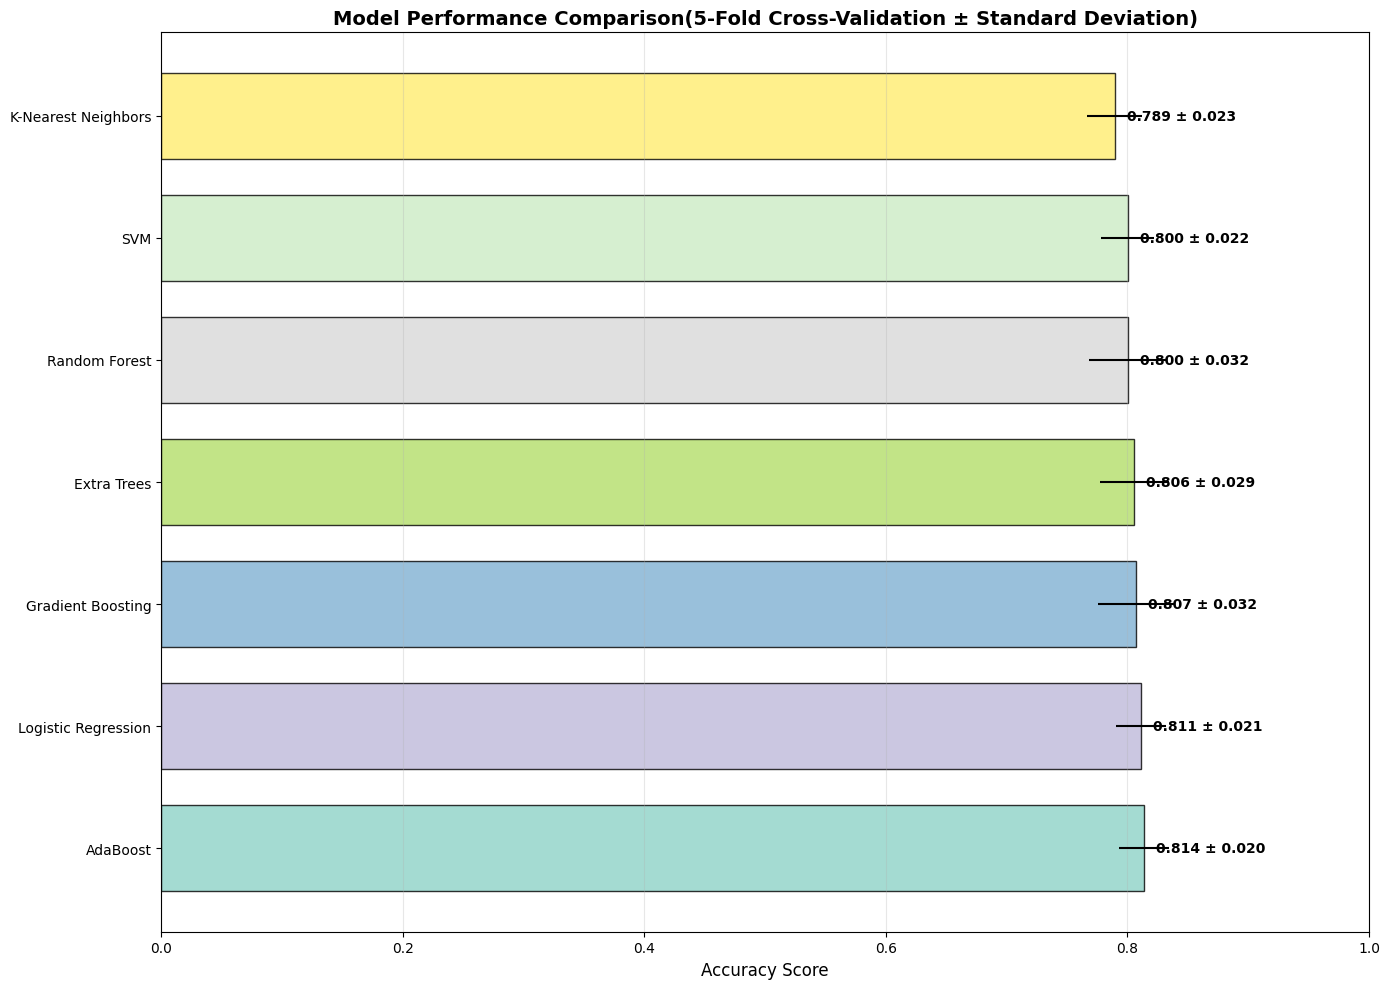

 Detailed CV Scores for AdaBoost:
  Fold 1: 0.8176
  Fold 2: 0.8027
  Fold 3: 0.8095
  Fold 4: 0.7891
  Fold 5: 0.8503


In [14]:
# Create visualization of model performance
plt.figure(figsize=(14, 10))
model_names = [name for name, _ in sorted_results]
mean_scores = [results['mean_accuracy'] for _, results in sorted_results]
std_scores = [results['std_accuracy'] for _, results in sorted_results]

colors = plt.cm.Set3(np.linspace(0, 1, len(model_names)))
bars = plt.barh(range(len(model_names)), mean_scores, xerr=std_scores, 
                alpha=0.8, color=colors, edgecolor='black', height=0.7)

plt.yticks(range(len(model_names)), model_names)
plt.xlabel('Accuracy Score', fontsize=12)
plt.title('Model Performance Comparison(5-Fold Cross-Validation ± Standard Deviation)', fontsize=14, fontweight='bold')
plt.xlim(0, 1)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (mean, std) in enumerate(zip(mean_scores, std_scores)):
    plt.text(mean + 0.01, i, f'{mean:.3f} ± {std:.3f}', 
             va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Show individual fold scores for the best model
print(f" Detailed CV Scores for {best_model_name}:")
best_scores = cv_results[best_model_name]['all_scores']
for fold, score in enumerate(best_scores, 1):
    print(f"  Fold {fold}: {score:.4f}")

In [15]:
adaBoost = AdaBoostClassifier(n_estimators=200, random_state=13)

adaBoost.fit(X_train, y_train)

# Evaluate on test set
y_pred = adaBoost.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Final Performance Comparison:")
print(f"Cross-Validation Accuracy: {best_cv_score:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Generalization Gap: {abs(best_cv_score - test_accuracy):.4f}")

if abs(best_cv_score - test_accuracy) < 0.05:
    print("Good generalization: CV and test performance are close!")
else:
    print("Potential overfitting: Large gap between CV and test performance")

print(" Detailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))



coef = adaBoost.feature_importances_

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': coef,
    'abs_importance': np.abs(coef)
}).sort_values('abs_importance', ascending=False)

print(f"AdaBoost features importance:\n {feature_importance}")

Final Performance Comparison:
Cross-Validation Accuracy: 0.8139
Test Set Accuracy: 0.8152
Generalization Gap: 0.0014
Good generalization: CV and test performance are close!
 Detailed Classification Report:
              precision    recall  f1-score   support

  No Disease       0.79      0.80      0.80        82
     Disease       0.84      0.82      0.83       102

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184

AdaBoost features importance:
     feature  coefficient  abs_importance
3  trestbps     0.198821        0.198821
4      chol     0.173716        0.173716
9   oldpeak     0.162649        0.162649
7   thalach     0.125517        0.125517
2        cp     0.120815        0.120815
0       age     0.100010        0.100010
1       sex     0.048888        0.048888
8     exang     0.034730        0.034730
5       fbs     0.020657        0.020657
6   restecg     0.014198  

In [16]:
# Define low-importance features (based on feature_importances_)
drop_features = ['restecg', 'fbs']

# Drop those features from training and test sets
X_train_reduced = X_train.drop(columns=drop_features)
X_test_reduced = X_test.drop(columns=drop_features)

# Initialize AdaBoost with tuned hyperparameters
ada_reduced = AdaBoostClassifier(n_estimators=200,random_state=13)

ada_reduced.fit(X_train_reduced, y_train)

# Evaluate on test set
y_pred = ada_reduced.predict(X_test_reduced)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Final Performance Comparison:")
print(f"Cross-Validation Accuracy: {best_cv_score:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Generalization Gap: {abs(best_cv_score - test_accuracy):.4f}")

if abs(best_cv_score - test_accuracy) < 0.05:
    print("Good generalization: CV and test performance are close!")
else:
    print("Potential overfitting: Large gap between CV and test performance")

print(" Detailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))



coef = ada_reduced.feature_importances_

feature_importance = pd.DataFrame({
    'feature': X_train_reduced.columns,
    'coefficient': coef,
    'abs_importance': np.abs(coef)
}).sort_values('abs_importance', ascending=False)

print(f"AdaBoost features importance:\n {feature_importance}")

Final Performance Comparison:
Cross-Validation Accuracy: 0.8139
Test Set Accuracy: 0.8152
Generalization Gap: 0.0014
Good generalization: CV and test performance are close!
 Detailed Classification Report:
              precision    recall  f1-score   support

  No Disease       0.78      0.82      0.80        82
     Disease       0.85      0.81      0.83       102

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184

AdaBoost features importance:
     feature  coefficient  abs_importance
4      chol     0.204181        0.204181
3  trestbps     0.201161        0.201161
7   oldpeak     0.174614        0.174614
5   thalach     0.133205        0.133205
2        cp     0.112072        0.112072
0       age     0.087736        0.087736
1       sex     0.050123        0.050123
6     exang     0.036909        0.036909


ROC-AUC: 0.9027


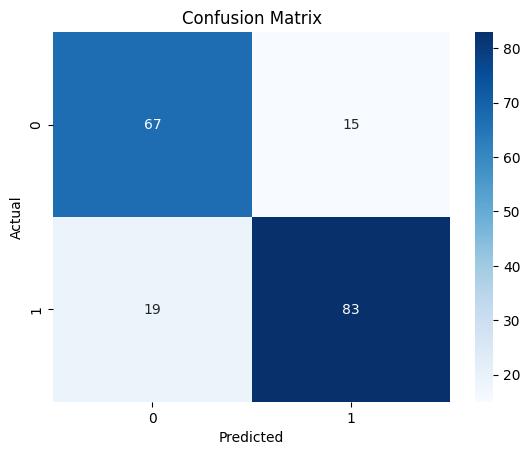

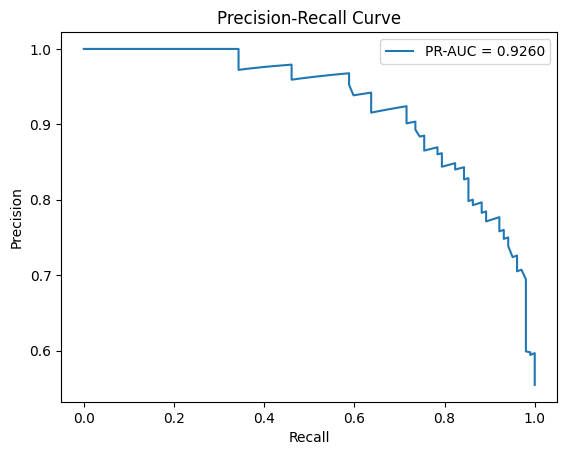

In [17]:
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_recall_curve, auc, classification_report

# Predict probabilities for the positive class
y_proba = ada_reduced.predict_proba(X_test_reduced)[:, 1]

# Compute ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

# Confusion matrix
y_pred = ada_reduced.predict(X_test_reduced)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Precision-Recall curve and PR-AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label=f'PR-AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [18]:
# Model Saving
import pickle

model_path = "../trained_models/heart_attack-ada_boost_model.pkl"

with open(model_path, 'wb') as f:
    pickle.dump(ada_reduced, f)